In [1]:
import torch
from torch.utils.data import DataLoader
from torch import nn
import torch.optim as optim

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'functions')))
from dataset import ChestXrayDataset
from train import train
from evaluation import plot_results ,eval_on_metrics
import timm

c:\Users\Furkan-PC\192.168.0.14+8000\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
IMAGE_PATH = "../archive/"
import glob

# Tüm alt klasörlerdeki jpg ve png dosyalarını alalım
image_paths = glob.glob(IMAGE_PATH + "**/images/*.[jp][pn]g", recursive=True)

print(f"Toplam {len(image_paths)} resim bulundu.")

Toplam 112120 resim bulundu.


In [3]:
TRAIN_PATH = '../data/AP_PA_Train.xlsx'
TEST_PATH = '../data/AP_PA_Test.xlsx'
VAL_PATH = '../data/AP_PA_Validation.xlsx'
LOG_PATH = 'logs/senetnofinetune.log'
SAVE_PATH = 'models/senetnofinetunebestmodel.pth'

In [4]:
num_classes = 2
EPOCHS = 30

In [5]:
model = timm.create_model('seresnext50_32x4d', pretrained=True)

model.reset_classifier(num_classes)

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
print(device)

cuda


In [7]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


In [8]:
train_dataset = ChestXrayDataset(TRAIN_PATH, image_paths,transform=transform)
val_dataset = ChestXrayDataset(TEST_PATH,image_paths, transform=transform)
test_dataset = ChestXrayDataset(VAL_PATH,image_paths, transform=transform)

In [9]:
print("Train size : ",len(train_dataset))
print("Validation size : ",len(val_dataset))
print("Test size : ",len(test_dataset))

Train size :  78566
Validation size :  16491
Test size :  17063


In [10]:
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True,num_workers=6)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=True,num_workers=6)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=True,num_workers=6)

In [ ]:
train_losses, train_accuracies, val_losses, val_accuracies = train(model, train_dataloader, val_dataloader, criterion, optimizer, device,num_epochs=EPOCHS,patience=5,save_path=SAVE_PATH)

Epoch 1/30 - Validation: 100%|██████████| 1031/1031 [01:16<00:00, 13.51it/s]


Epoch [1/30]
  Train Loss: 0.0329, Train Acc: 0.9922
  Val   Loss: 0.0332, Val   Acc: 0.9927
  Best model saved with val_loss: 0.0332


Epoch 2/30 - Validation: 100%|██████████| 1031/1031 [01:13<00:00, 14.01it/s]


Epoch [2/30]
  Train Loss: 0.0271, Train Acc: 0.9940
  Val   Loss: 0.0246, Val   Acc: 0.9950
  Best model saved with val_loss: 0.0246


Epoch 3/30 - Validation: 100%|██████████| 1031/1031 [01:13<00:00, 13.94it/s]


Epoch [3/30]
  Train Loss: 0.0230, Train Acc: 0.9951
  Val   Loss: 0.0253, Val   Acc: 0.9953
  No improvement. Early stopping counter: 1/5


Epoch 4/30 - Validation: 100%|██████████| 1031/1031 [01:14<00:00, 13.93it/s]


Epoch [4/30]
  Train Loss: 0.0206, Train Acc: 0.9955
  Val   Loss: 0.0222, Val   Acc: 0.9954
  Best model saved with val_loss: 0.0222


Epoch 5/30 - Validation: 100%|██████████| 1031/1031 [01:13<00:00, 13.95it/s]


Epoch [5/30]
  Train Loss: 0.0188, Train Acc: 0.9958
  Val   Loss: 0.0275, Val   Acc: 0.9928
  No improvement. Early stopping counter: 1/5


Epoch 6/30 - Validation: 100%|██████████| 1031/1031 [01:13<00:00, 13.95it/s]


Epoch [6/30]
  Train Loss: 0.0165, Train Acc: 0.9959
  Val   Loss: 0.0226, Val   Acc: 0.9958
  No improvement. Early stopping counter: 2/5


Epoch 7/30 - Validation: 100%|██████████| 1031/1031 [01:14<00:00, 13.93it/s]


Epoch [7/30]
  Train Loss: 0.0153, Train Acc: 0.9964
  Val   Loss: 0.0206, Val   Acc: 0.9958
  Best model saved with val_loss: 0.0206


Epoch 8/30 - Validation: 100%|██████████| 1031/1031 [01:23<00:00, 12.41it/s]


Epoch [8/30]
  Train Loss: 0.0137, Train Acc: 0.9964
  Val   Loss: 0.0220, Val   Acc: 0.9953
  No improvement. Early stopping counter: 1/5


Epoch 9/30 - Validation: 100%|██████████| 1031/1031 [01:24<00:00, 12.15it/s]


Epoch [9/30]
  Train Loss: 0.0117, Train Acc: 0.9970
  Val   Loss: 0.0219, Val   Acc: 0.9956
  No improvement. Early stopping counter: 2/5


Epoch 10/30 - Validation: 100%|██████████| 1031/1031 [01:14<00:00, 13.92it/s]


Epoch [10/30]
  Train Loss: 0.0102, Train Acc: 0.9973
  Val   Loss: 0.0274, Val   Acc: 0.9958
  No improvement. Early stopping counter: 3/5


Epoch 11/30 - Validation: 100%|██████████| 1031/1031 [01:24<00:00, 12.25it/s]


Epoch [11/30]
  Train Loss: 0.0083, Train Acc: 0.9976
  Val   Loss: 0.0277, Val   Acc: 0.9944
  No improvement. Early stopping counter: 4/5


Epoch 12/30 - Validation: 100%|██████████| 1031/1031 [01:14<00:00, 13.84it/s]

Epoch [12/30]
  Train Loss: 0.0074, Train Acc: 0.9978
  Val   Loss: 0.0346, Val   Acc: 0.9951
  No improvement. Early stopping counter: 5/5
  Early stopping triggered. Training stopped.


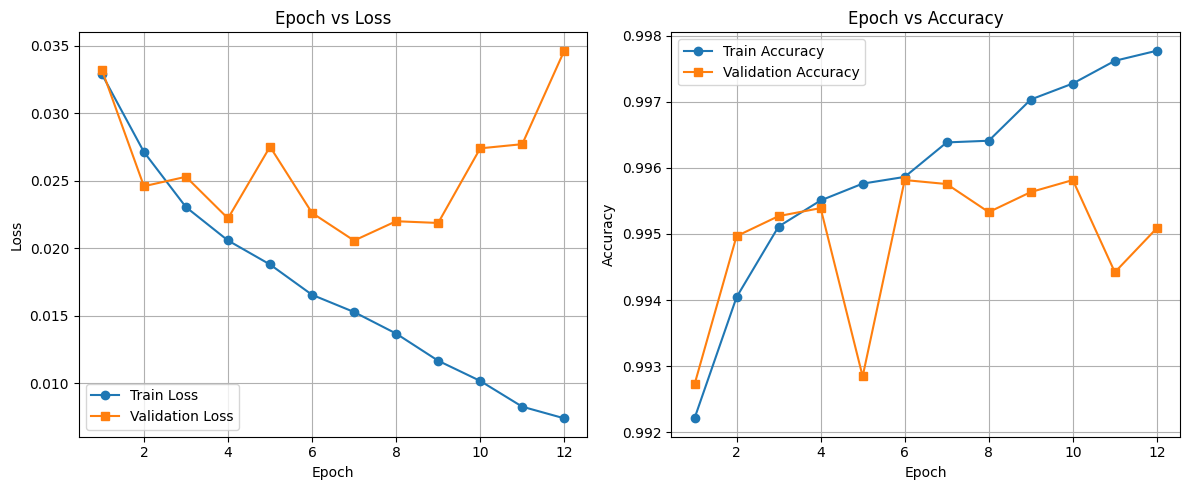

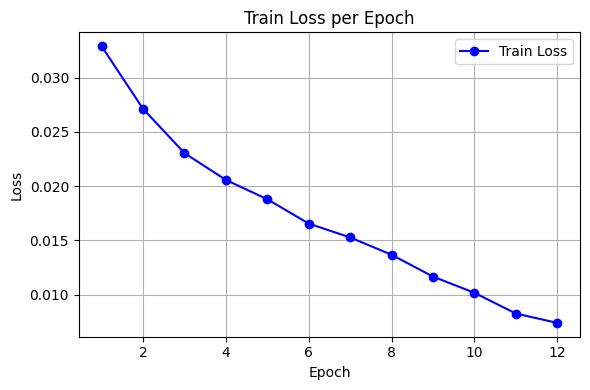

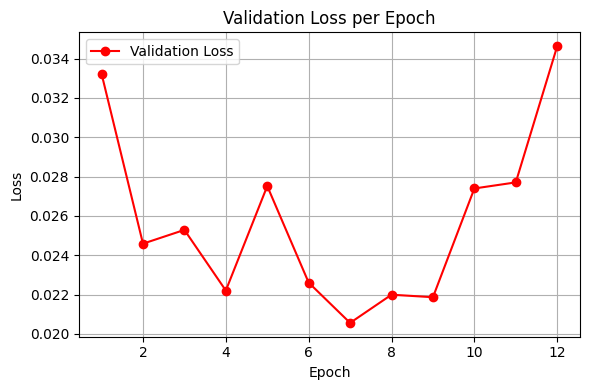

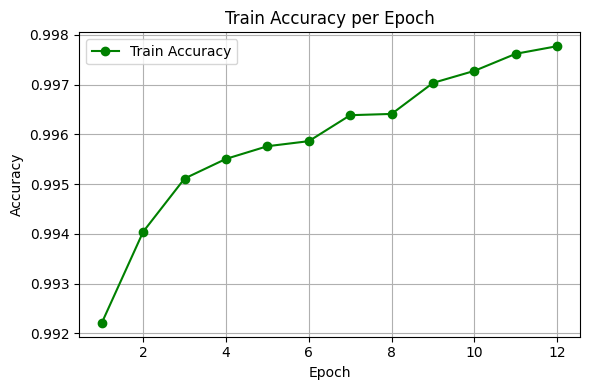

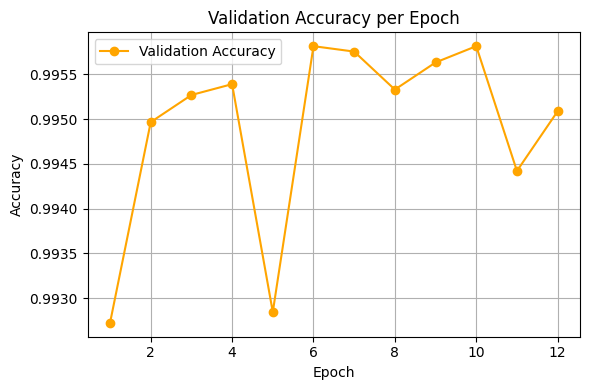

In [12]:
plot_results(train_losses, train_accuracies, val_losses, val_accuracies)

Evaluating: 100%|██████████| 1067/1067 [01:26<00:00, 12.35it/s]

Precision: 0.9948
Recall:    0.9974
F1 Score:  0.9961
AUC:       0.9994


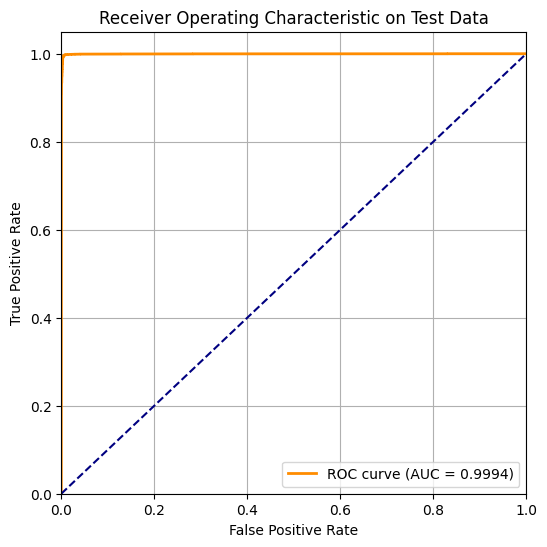

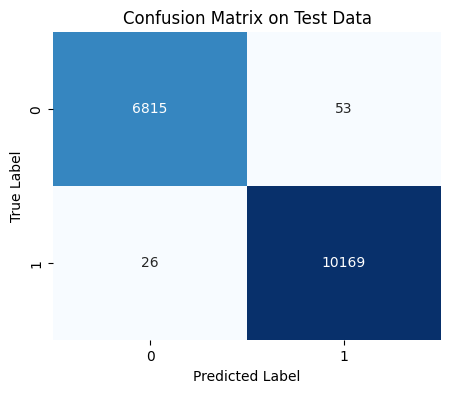

In [13]:
eval_on_metrics(model, test_dataloader)